In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

### Test Data

In [94]:
from stockMarket.api import populate_contracts
from stockMarket.core import Contract

ticker = Contract(ticker='AAPL')
contracts = populate_contracts(ticker)
contract = contracts[0]
print(contract.book_value_per_share)
print(contract.price_to_book())
print(contract.pbg(3))

[3.99651 3.17824 3.84068 3.84873 5.09133 5.6334 ]
[45.6173011  57.36193617 47.46815668 47.36887233 35.80793231 32.36233891]
[36.09357878 -5.16175493 -6.43622731]


### Retrieve Data

In [2]:
from stockMarket.core import get_tickers_from_index
from stockMarket.api import populate_contracts

tickers = get_tickers_from_index('sp500')
contracts = populate_contracts(tickers)

### Initialize Ranking

In [3]:
from stockMarket.ranking import Ranking
from stockMarket.ranking.specialRankingObjects import (
    create_equity_ratio_ranker,
    create_netto_margin_ranker,
    create_return_on_assets_ranker,
    create_goodwill_ranker,
    create_gearing_ranker,
    create_dynamic_gearing_ranker,
    create_asset_coverage_ratio_ranker,
    create_peg_ranker,
    create_prg_ranker,
    create_pfcg_ranker,
    create_pbg_ranker,
)

years_back = 0

equity_ratio_ranker = create_equity_ratio_ranker([10, 30], [0,1,2])
netto_margin_ranker = create_netto_margin_ranker([10, 20], [0,1,2])
return_on_assets_ranker = create_return_on_assets_ranker([5, 10], [0,1,2])
goodwill_ranker = create_goodwill_ranker([0, 30], [0,1,0])
gearing_ranker = create_gearing_ranker([20, 60], [2,1,0])
dynamic_gearing_ranker = create_dynamic_gearing_ranker([2, 5], [2,1,0])
current_assets_coverage_ratio_ranker = create_asset_coverage_ratio_ranker([100, 130], [0,1,2])
peg_ranker_callable = lambda x, y: create_peg_ranker(growth_years=3, cutoffs=[0.8, 1.2], scores=[2,1,0], date=x, years_back=y)
prg_ranker_callable = lambda x, y: create_prg_ranker(growth_years=3, cutoffs=[0.4, 0.8], scores=[2,1,0], date=x, years_back=y)
pfcg_ranker_callable = lambda x, y: create_pfcg_ranker(growth_years=3, cutoffs=[0.6, 1.2], scores=[2,1,0], date=x, years_back=y)
pbg_ranker_callable = lambda x, y: create_pbg_ranker(growth_years=3, cutoffs=[0.6, 1.2], scores=[2,1,0], date=x, years_back=y)

ranking_list = [
    equity_ratio_ranker,
    netto_margin_ranker,
    return_on_assets_ranker,
    goodwill_ranker,
    gearing_ranker,
    dynamic_gearing_ranker,
    current_assets_coverage_ratio_ranker,
    peg_ranker_callable,
    prg_ranker_callable,
    pfcg_ranker_callable,
    pbg_ranker_callable,
    
]

peg_ranker = peg_ranker_callable(None, years_back)
prg_ranker = prg_ranker_callable(None, years_back)
pfcg_ranker = pfcg_ranker_callable(None, years_back)
pbg_ranker = pbg_ranker_callable(None, years_back)

### Perform Ranking

In [10]:
ranking = Ranking(contracts, ranking_list, years_back=years_back)
ranking.rank()
ranking.ranking.to_csv("ranking_contracts.csv", sep=',', encoding='utf-8', float_format='%.2f')
ranking.ranking

,Name,Sector,Relative Score,Absolute Score,No Data/Constraints/Tot.,Equity Ratio,Equity Ratio Score,Netto Margin,Netto Margin Score,Return on Assets,...,Asset Coverage Ratio,Asset Coverage Ratio Score,PEG,PEG Score,PRG,PRG Score,PFCG,PFCG Score,PBG,PBG Score
BLK,"BlackRock, Inc.",Financial Services,100.00%,1.0/1,10*0*11,NaN,0.0,30.807996,1.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
JNJ,Johnson & Johnson,Healthcare,100.00%,1.0/1,10*0*11,NaN,0.0,41.279254,1.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
STLD,"Steel Dynamics, Inc.",Basic Materials,95.45%,10.5/11,0*0*11,59.474217,1.0,13.039855,0.5,16.439582,...,141.341077,1.0,0.102220,1.0,0.028976,1.0,0.084473,1.0,0.056022,1.0
AMAT,"Applied Materials, Inc.",Technology,95.45%,10.5/11,0*0*11,53.203814,1.0,25.855112,1.0,22.311172,...,188.309446,1.0,0.877817,0.5,0.327432,1.0,0.463848,1.0,0.544330,1.0
ON,ON Semiconductor Corporation,Technology,95.45%,10.5/11,0*0*11,51.663397,1.0,22.845956,1.0,15.880119,...,148.136532,1.0,0.170827,1.0,0.317648,1.0,0.243589,1.0,0.140907,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NCLH,Norwegian Cruise Line Holdings Ltd.,Consumer Cyclical,0.00%,0.0/11,0*4*11,0.369609,0.0,-46.862541,0.0,-12.231633,...,76.111035,0.0,0.014565,0.0,-0.051195,0.0,-0.101969,0.0,0.092566,0.0
PKG,Packaging Corporation of America,Consumer Cyclical,0.00%,0.0/1,10*0*11,NaN,0.0,9.807239,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
MS,Morgan Stanley,Financial Services,0.00%,0.0/1,10*0*11,NaN,0.0,9.446535,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
MRK,"Merck & Co., Inc.",Healthcare,0.00%,0.0/1,10*0*11,NaN,0.0,0.607170,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0


### Plot Stuff

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/jag/projects/stockMarket/stockMarket/ranking/rankingPlotter.py:78: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight

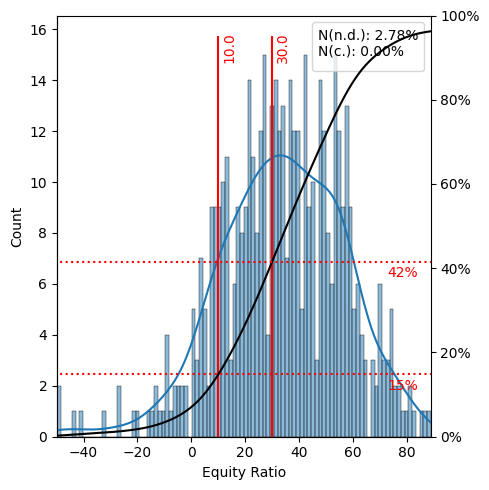

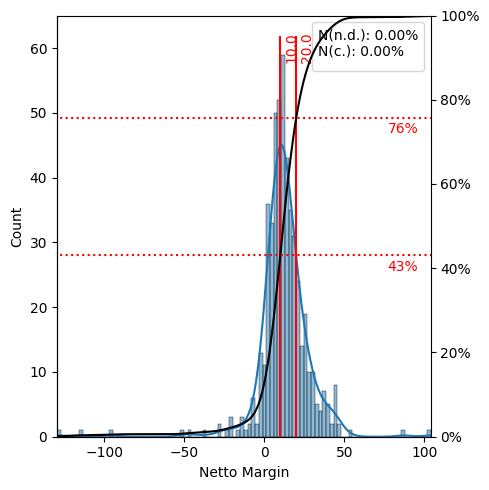

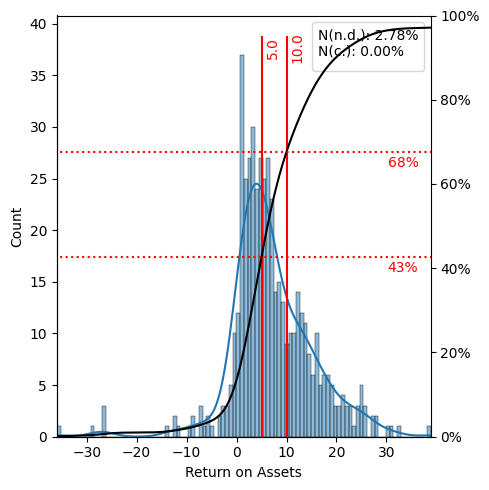

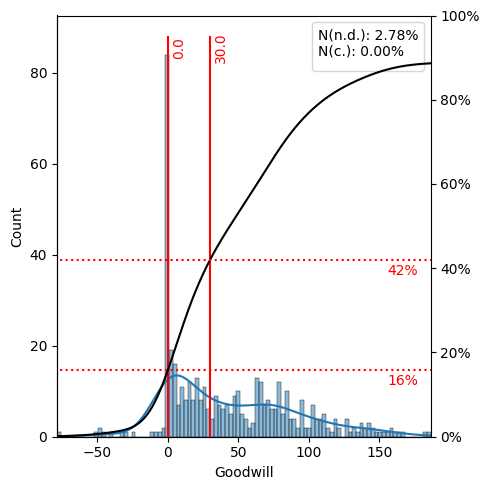

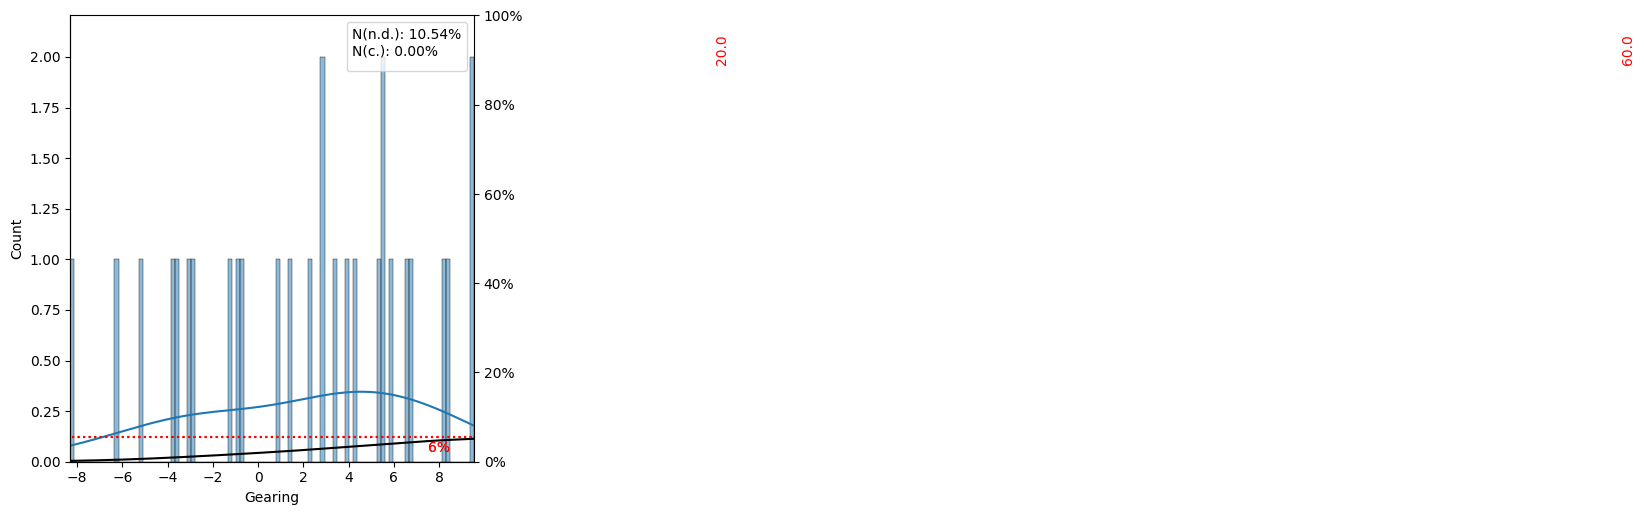

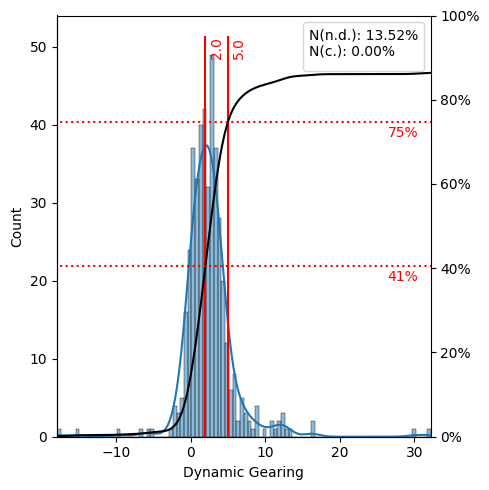

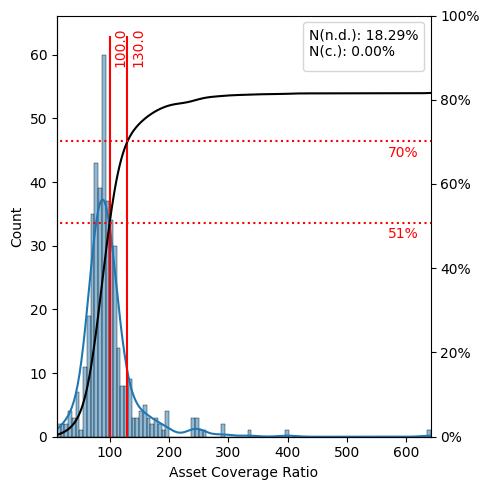

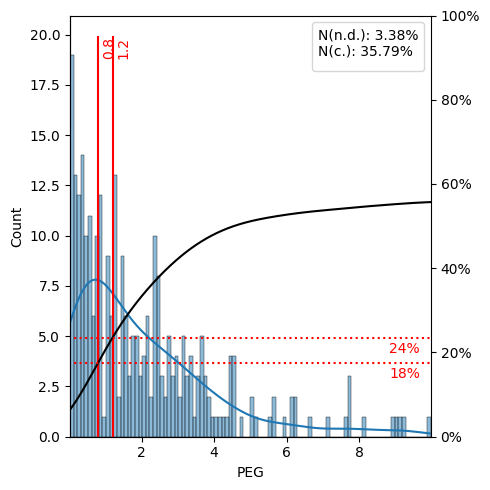

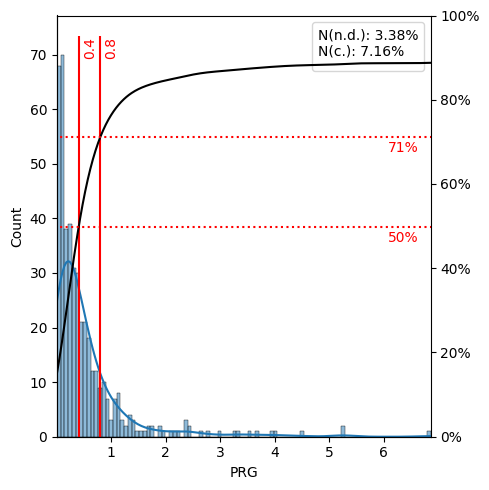

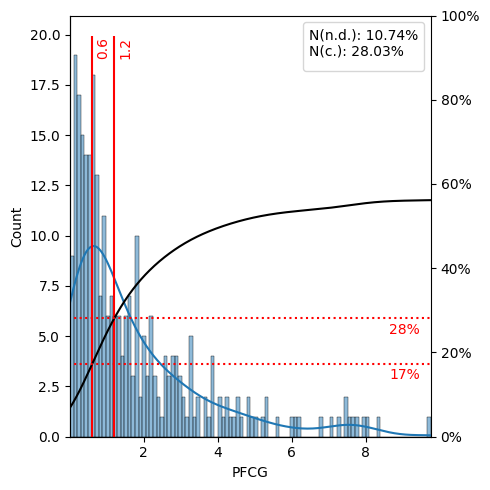

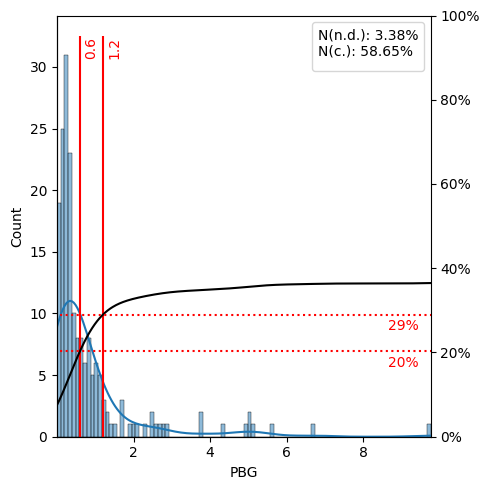

In [11]:
from stockMarket.ranking.rankingPlotter import RankingPlotter

ranking_plotter = RankingPlotter(ranking)
ranking_plotter.plot(equity_ratio_ranker, "equity_ratio.png", (-50, 100))
ranking_plotter.plot(netto_margin_ranker, "netto_margin.png")
ranking_plotter.plot(return_on_assets_ranker, "return_on_assets.png")
ranking_plotter.plot(goodwill_ranker, "goodwill.png", (-100, 199))
ranking_plotter.plot(gearing_ranker, "gearing.png", (-10, 10))
ranking_plotter.plot(dynamic_gearing_ranker, "dynamic_gearing.png", (-100, 199))
ranking_plotter.plot(current_assets_coverage_ratio_ranker, "current_assets_coverage_ratio.png")
ranking_plotter.plot(peg_ranker, "peg.png", (0, 10))
ranking_plotter.plot(prg_ranker, "prg.png", (0, 10))
ranking_plotter.plot(pfcg_ranker, "pfcg.png", (0, 10))
ranking_plotter.plot(pbg_ranker, "pbg.png", (0, 10))

plotting_files = [
    "equity_ratio.png",
    "netto_margin.png",
    "return_on_assets.png",
    "goodwill.png",
    "gearing.png",
    "dynamic_gearing.png",
    "current_assets_coverage_ratio.png",
    "peg.png",
    "prg.png",
    "pfcg.png",
    "pbg.png"
]

### Backtesting

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:02<00:00,  2.60s/it]
/home/jag/projects/stockMarket/stockMarket/ranking/backTester/backTester.py:112: RuntimeWarning: Mean of empty slice
  average_performance = np.array(np.nanmean(performance, axis=0))[0]
/home/jag/projects/stockMarket/stockMarket/ranking/backTester/backTester.py:140: RuntimeWarning: Mean of empty slice
  average_performance = np.array(np.nanmean(performance, axis=0))[0]


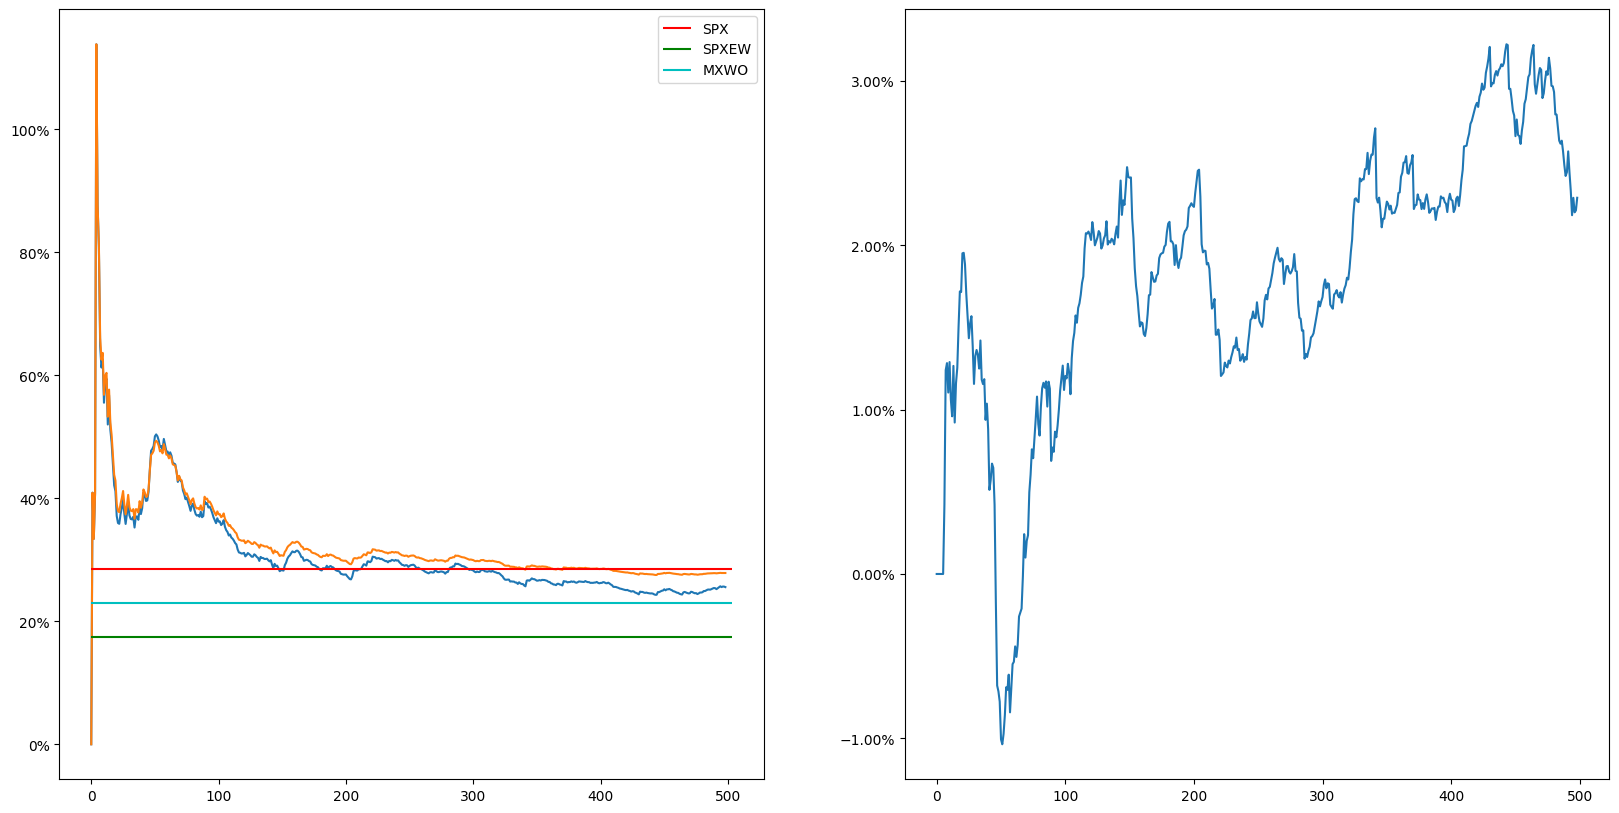

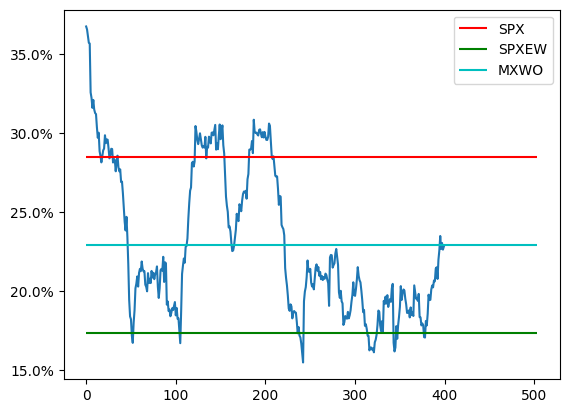

In [16]:
import datetime as dt

from stockMarket.ranking.backTester.backTester import BackTester
from stockMarket.utils.period import Period

back_tester = BackTester(contracts, ranking_list)
start_date = dt.date.today() # - dt.timedelta(days=364*0.5)
end_date = dt.date.today() # - dt.timedelta(days=0)
years_back = 3
# period = Period("monthly", amount=6)
period = Period("annual", amount=3)
frequency = "daily"
back_tester.back_test(date=start_date, end_date=end_date, period=period, frequency=frequency, years_back=years_back)
back_tester.plot_cumulative_performance()
back_tester.plot_single_performances()

In [84]:
back_tester.ranking.ranking
# back_tester.prices

,Name,Sector,Relative Score,Absolute Score,No Data/Constraints/Tot.,Equity Ratio,Equity Ratio Score,Netto Margin,Netto Margin Score,Return on Assets,...,Goodwill,Goodwill Score,Gearing,Gearing Score,PEG,PEG Score,PRG,PRG Score,PFCG,PFCG Score
EA,Electronic Arts Inc.,Communication Services,100.00%,5.0/5,3*0*8,67.143629,1.0,54.885317,1.0,27.348812,...,25.264710,1.0,-50.810883,1.0,NaN,0.0,NaN,0.0,NaN,0.0
META,"Meta Platforms, Inc.",Communication Services,100.00%,5.0/5,3*0*8,80.525496,1.0,33.904496,1.0,18.294459,...,14.849170,1.0,-42.686881,1.0,NaN,0.0,NaN,0.0,NaN,0.0
BIO,"Bio-Rad Laboratories, Inc.",Healthcare,100.00%,5.0/5,3*0*8,71.858638,1.0,76.078479,1.0,21.959121,...,4.589546,1.0,-7.983327,1.0,NaN,0.0,NaN,0.0,NaN,0.0
CPRT,"Copart, Inc.",Industrials,100.00%,5.0/5,3*0*8,72.050013,1.0,31.733424,1.0,20.256270,...,13.802763,1.0,0.981918,1.0,NaN,0.0,NaN,0.0,NaN,0.0
PSA,Public Storage,Real Estate,100.00%,5.0/5,3*0*8,83.295434,1.0,54.045414,1.0,13.437357,...,1.953018,1.0,14.934515,1.0,NaN,0.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DAL,"Delta Air Lines, Inc.",Industrials,0.00%,0.0/5,3*0*8,2.130674,0.0,-72.448084,0.0,-17.202345,...,635.788787,0.0,1270.860495,0.0,NaN,0.0,NaN,0.0,NaN,0.0
GE,General Electric Company,Industrials,0.00%,0.0/5,3*0*8,9.959431,0.0,-23.042510,0.0,-7.186118,...,109.660760,0.0,125.780317,0.0,NaN,0.0,NaN,0.0,NaN,0.0
VLTO,Veralto Corporation,Industrials,0.00%,0/0,8*0*8,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
CEG,Constellation Energy Corporation,Utilities,0.00%,0/0,8*0*8,NaN,0.0,NaN,0.0,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0


### Write Email

In [12]:
from stockMarket.utils import write_email

emails = ["benjaminlantschner@gmail.com", "97gamjak@gmail.com"]
subject = "Stock Market Ranking"
body = ""
attachment = ["ranking_contracts.csv"] + plotting_files
write_email(emails, subject, body, attachment)